In [69]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

In [70]:
# Clasification problem
import pandas as pd
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
df_cla = pd.read_csv(filename, names=names)
array = df_cla.values
X_cla = array[:,0:8]
Y_cla = array[:,8]

In [71]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
x_reg = load_boston()
df_reg = pd.DataFrame(x_reg.data, columns = x_reg.feature_names)
df_reg["MEDV"] = x_reg.target
X_reg = df_reg.drop("MEDV",1)   #Feature Matrix
y_reg = df_reg["MEDV"]

In [72]:
#importing libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split

##### EN LA CREACION DE LA MATRIZ DE CORRELACION DEBEMOS FIJARNOS EN DOS COSAS: 1) QUE ATRIBUTOS REPRESENTAN UNA MAYOR CORRELACION CON EL TARGET ESTA CORRELACION ESTA ENTRE 1 Y -1, LOS MEJORES ATRIBUTOS TENDRAN VALORES CERCANOS A ESTOS
##### LOS ATRIBUTOS QUE TENGAN UNA CORRELACION MUY ALTA ENTRE SI SE DEBEN ELIMINAR YA QUE SIN LINEALMENTE DEPENDIENTES O ALTAMENTE CORRELACIONADOS 

<a id="section22"></a>
## <font color="#004D7F"> La evaluacion de la correlacion de pearson se usa mas para caracteristicas continuas y con su prediccion igualmente continua </font>

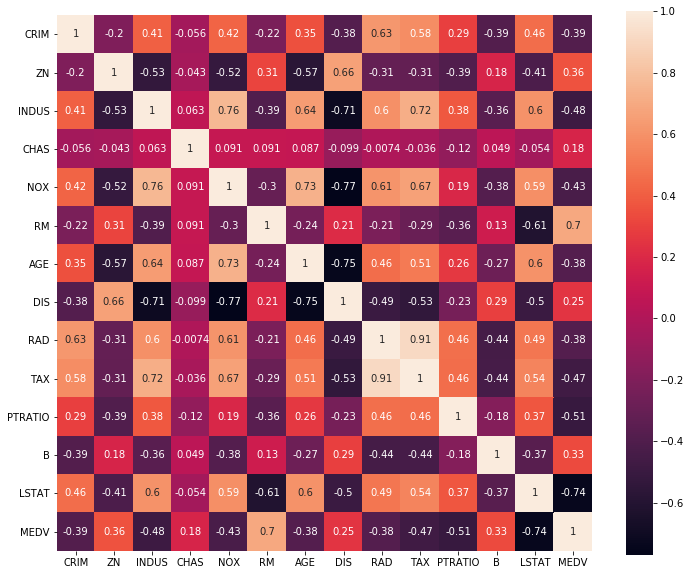

In [73]:
#Using Pearson Correlation
correlacion = df_reg.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(correlacion, square=True, annot=True)
plt.show()

In [59]:
## CORRELACION CON VARIABLES DE SALIDA, ## OBSERVAMOS LA CORRELACION QUE TIENES LAS VARIABLES
## CON NUESTRO TARGET
cor_target = abs(correlacion['MEDV'])
cor_target

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [60]:
## SELECCIONAMOS LAS MAS RELEVANTES 
relevant_features = cor_target[cor_target>=0.60]
relevant_features
## ESTAS CARACTERISTICAS NO DEBEN ELMINARSE Y DEBEN TENERSE EN CUENTA 

RM       0.695360
LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

<a id="section22"></a>
## <font color="#004D7F"> Características altamente correlacionadas </font>

In [61]:
corr_matrix = df_reg.corr().abs()
superior = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in superior.columns if any(superior[column] > 0.75)]
to_drop

['NOX', 'DIS', 'TAX']

In [62]:
## SABIENDO YA CUALES ATRIBUTOS SON SE ELIMINAN DEL df orginal
df_reg = df_reg.drop(df_reg[to_drop], axis=1)


<a id="section23"></a>
## <font color="#004D7F"> Eliminación Backward PVALUES</font>

Al principio le brindamos todas las características posibles al modelo. Verificamos el rendimiento del modelo y luego eliminamos iterativamente las características de peor rendimiento una por una hasta que el rendimiento general del modelo se encuentre en un rango aceptable.

La métrica de rendimiento utilizada aquí para evaluar el rendimiento de la característica es $p-value$. Si el valor $p$ está por encima de 0.05, eliminamos la característica, de lo contrario la conservamos.

Como podemos ver, la variable _AGE_ tiene un valor más alto de 0.9582293, que es mayor que 0.05. Además _INDUS_ también tiene un valor mayor a 0.05, por tanto, eliminaremos esta característica.

In [38]:
import statsmodels.api as sm
X_1 = sm.add_constant(X_reg)
model = sm.OLS(y_reg, X_1).fit()
model.pvalues

## EN ESNTE CASO SE ELIMINAN CON LAS CONDICIONES ANTERIORMENTE ESCRITAS

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

EN ESTE METODO LO QUE SE HACE ES HACER UN MODELO LINEAL Y CUANDO SE EJECTUTE, SE EVALUAN SUS VALORES PVALUE PARA SABER QUE CARACTERISTICAS FUERON IMPORTANTES Y CUALES NO PARA EL MODELO, APARTIR DE ESTO PODEMOS ELIMINARLAS. EN ESTE CASO SE HIZO CON SNS.OLS PARA SER MAS RAPIDO, OLS ES REGRESION LINEAL

<a id="section24"></a>
## <font color="#004D7F"> Selección univariable  CHI CUADRADO</font>

ESTE ES USADO PARA PROBLEMAS DE CLASIFICACION, SI OBSERVAMOS EL DATASET ES UN PROBLEMA SOBRE SI TIENE CANCER O NO. OTROS METODOS QUE SE PUEDEN USAR:
https://scikit-learn.org/stable/modules/feature_selection.html





f_classif : se utiliza solo para objetivos categóricos y se basa en la prueba estadística de análisis de varianza (ANOVA).

chi2 : realiza la estadística de chi-cuadrado para objetivos categóricos, que es menos sensible a la relación no lineal entre la variable predictiva y su objetivo. (Si hay variables negativas no va a servir, lo cual se puede solucionar normalizando pero si los datos no se pueden cambiar ya sea porque al ser negativos son importantes, se usa f_classif)

In [75]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif

top4_chi = SelectKBest(chi2,k=4).fit_transform(X_cla, Y_cla)
top4_anova = SelectKBest(f_classif, k=4).fit_transform(X_cla, Y_cla)

print(top4_chi)
print(top4_anova)

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 ...
 [  5.  121.   26.2  30. ]
 [  1.  126.   30.1  47. ]
 [  1.   93.   30.4  23. ]]


In [77]:
## PODEMOS OBSERVAR QUE PARA EL METODO DE FILTRO DE CHI LAS CARACTERISTICAS MAS IMPORTANTES SON:
## PLAS-TEST-MASS-AGE MIENTRAS QUE PARA ANOVA ES PREG-PLAS-MASS-AGE
df_cla

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la clase [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest#sklearn.feature_selection.SelectKBest). 
</div> 

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Eliminación recursiva de características </font>

La eliminación de características recursivas (RFE) funciona eliminando recursivamente los atributos y construyendo un modelo sobre los atributos que quedan. Utiliza la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a predecir el atributo objetivo.

Puede ver que RFE eligió las 3 características principales como _preg, plas_ y _mass._ Estos están marcados como `True` en la matriz de soporte y marcados con una opción 1 en la matriz de clasificación. Nuevamente, puede asignar manualmente los índices de características a los índices de nombres de atributos.

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(model, 4).fit_transform(X_cla, Y_cla)
print(rfe)

[[  6.    148.     33.6     0.627]
 [  1.     85.     26.6     0.351]
 [  8.    183.     23.3     0.672]
 ...
 [  5.    121.     26.2     0.245]
 [  1.    126.     30.1     0.349]
 [  1.     93.     30.4     0.315]]


<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Más información en la documentación oficial sobre la clase [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE). 
</div> 

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>